In [241]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image,ImageOps
from os import listdir
from os.path import isfile, join

In [242]:
digits = datasets.load_digits()

In [243]:
zero = ['0_0','0_1','0_2','0_3']
one = ['1_0','1_1','1_2','1_3']
two = ['2_0','2_1','2_2','2_3']
three = ['3_0','3_1','3_2','3_3']
four = ['4_0','4_1','4_2','4_3']
five = ['5_0','5_1','5_2','5_3']
six = ['6_0','6_1','6_2','6_3']
seven = ['7_0','7_1','7_2','7_3']
eight = ['8_0','8_1','8_2','8_3']
nine = ['9_0','9_1','9_2','9_3']

In [244]:
folder = listdir('dataset')
y = []
count = 0
for dir in  folder:
    f = listdir('dataset/'+dir)
    length = len(f)
    for name in f:
        img = Image.open('dataset/'+dir+'/'+name).convert('L')
        # img = ImageOps.invert(img)
        img = np.array(img.resize((8,8),Image.ANTIALIAS))
        pixel = img/255*16
        pixel.astype('int')
        digit_1_001 = pixel.reshape(1,-1)[0]
        if count == 0:
            df = pd.DataFrame([digit_1_001])
            count = 1
        else:
            df  = df.append([digit_1_001],ignore_index=True)
        if dir in zero:
            y.append(0)
        elif dir in one:
            y.append(1)
        elif dir in two:
            y.append(2)
        elif dir in three:
            y.append(3)
        elif dir in four:
            y.append(4)
        elif dir in five:
            y.append(5)
        elif dir in six:
            y.append(6)
        elif dir in seven:
            y.append(7)
        elif dir in eight:
            y.append(8)
        elif dir in nine:
            y.append(9)
        


# Show Digit images

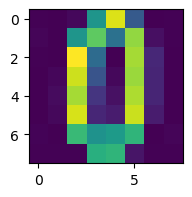

In [245]:
img = np.array(df.iloc[1]).reshape(8,8)
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()

# Train Test

In [246]:
X = df
y = np.array(y)
X.shape, y.shape

((1373, 64), (1373,))

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [249]:
from sklearn.neural_network import MLPClassifier

# MLP

In [250]:
mlpc = MLPClassifier(hidden_layer_sizes=(208,208),max_iter=1000,alpha=1e-10,solver='sgd',random_state=42,activation='tanh')
mlpc.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=1e-10, hidden_layer_sizes=(208, 208),
              max_iter=1000, random_state=42, solver='sgd')

In [251]:
mlpc.score(X_test,y_test)

0.9945454545454545

# Performance

In [252]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [253]:
y_pre = mlpc.predict(X_test)

In [254]:
print(classification_report(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        64
           8       1.00      1.00      1.00        40
           9       1.00      0.94      0.97        49

    accuracy                           0.99       550
   macro avg       0.99      0.99      0.99       550
weighted avg       0.99      0.99      0.99       550

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0 62  0  0  0  0  0  0]
 [ 0  0  0  0 57  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0

# See Wrong Prediction

In [255]:
id_miss = np.where(y_test!= y_pre) #index that missing

In [256]:
d = {'predict':y_pre[id_miss],'actual':y_test[id_miss]}

In [257]:
pd.DataFrame(data=d)

,predict,actual
0,0,9
1,0,9
2,0,9


In [258]:
fig = plt.figure(figsize=(8,8))
for j,k in enumerate(id_miss[0]):
    plt.subplot(2,7,j+1)
    plt.imshow(X_test[k].reshape(8,8))
    plt.title(y_test[k])
    plt.xticks([])
    plt.yticks([])
plt.show()

KeyError: 204

# Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param = {
    'activation':['identity','logistic','tanh','relu'],
    'solver' :['lbfgs','sgd','adam'],
    'alpha':[1e-5,1e-7,1e-9],
    'learning_rate_init':[1e-5,1e-7,1e-9],
    'max_iter':[500],
    'shuffle':[True,False],
    'random_state':[42],
    'warm_start':[True,False],
    'nesterovs_momentum':[True,False],
    'early_stopping':[True,False],
    'learning_rate':['invscaling','constant','adaptive'],
    'hidden_layer_sizes':[(208,208),(11,11,11),(52,52),(5,2,1)]

}

In [ ]:
gsv = RandomizedSearchCV(MLPClassifier(),param,verbose=1,cv=5,n_jobs=-1)
gsv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [1e-05, 1e-07, 1e-09],
                                        'early_stopping': [True, False],
                                        'hidden_layer_sizes': [(208, 208),
                                                               (11, 11, 11),
                                                               (52, 52),
                                                               (5, 2, 1)],
                                        'learning_rate': ['invscaling',
                                                          'constant',
                                                          'adaptive'],
                                        'learning_rate_init': [1e-05, 1e-07,
                                                   

In [ ]:
y_pre = gsv.predict(X_test)
print(classification_report(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        51
           5       1.00      0.92      0.96        49
           6       0.92      1.00      0.96        46
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        41
           9       1.00      1.00      1.00        44

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0 62  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 45  4  0  0  0]
 [ 0  0  0  0  0  0 46  0  0  0]
 [ 0  0  0

# Test Own Data

In [ ]:
from PIL import Image,ImageOps

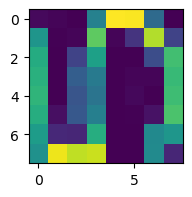

Predict digits is  5


In [261]:
my_images = '5invert2.png'
my_label_y = [5]

fname = 'images/'+my_images
img = Image.open(fname).convert('L')
img = ImageOps.invert(img)
img = img.resize((8,8),Image.ANTIALIAS)
pixel = np.array(img)/255*16
pixel = pixel.astype('int')
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()
my_digit = pixel.reshape(1,-1)
print("Predict digits is ",gsv.predict(my_digit)[0])